# Partitions


Partitions are a categorical construction that we derive from sets and functions.
Given a set A, you can think of all of the ways to partition A into parts.
These ways of partitioning are isomorphic to equivalence relations R ⊆ A × A.

The first step is our Catlab imports

In [1]:
using Core: GeneratedFunctionStub
using Test

using Catlab, Catlab.Theories, Catlab.CategoricalAlgebra
import Catlab.Theories: compose
using DataStructures
using PrettyTables
PrettyTables.pretty_table(f::FinFunction, name::Symbol=:f) =
  pretty_table(OrderedDict(:x=>1:length(dom(f)), Symbol("$(name)(x)")=>collect(f)))
using LaTeXStrings

## FinSet: the category of Finite Sets
In FinSet the objects are sets n = {1...n} and the morphisms are functions between finite sets.
You can wrap a plain old Int into a finite set with the FinSet(n::Int) function. These sets will
serve as the domain and codomains of our functions.

In [2]:
n = FinSet(3)
m = FinSet(4)

FinSet(4)

once you have some sets, you can define functions between them. A FinFunction from n to m, f:n→m, can be specified as
an array of length n with elements from m.

In [3]:
f = FinFunction([2,4,3], n, m)

pretty_table(f)

┌───────┬───────┐
│     x │  f(x) │
│ Int64 │ Int64 │
├───────┼───────┤
│     1 │     2 │
│     2 │     4 │
│     3 │     3 │
└───────┴───────┘


## Surjective maps
In order to use a map to represent a partition, we have to make sure that it is surjective.
Given a FinFunction, we can compute the preimage of any element in its codomain.

In [4]:
preimage(f, 2)

preimage(f, 1)

Int64[]

If the preimage is empty, then there is no element in the domain that maps to that element of the codomain.
This gives us a definition of surjective functions by asserting that all the preimages are nonempty.
Julia note: !p is the predicate x ↦ ¬p(x), f.(A) applies f to all of the elements in A.

In [5]:
is_surjective(f::FinFunction) = all((!isempty).(preimage(f,i) for i in codom(f)))
is_surjective(f)

false

Our function f, wasn't surjective so it can't be used to induce a partition via its preimages.
Let's try again,

In [6]:
g = FinFunction([1,2,3,3], m, n)
pretty_table(g, :g)
is_surjective(g)

┌───────┬───────┐
│     x │  g(x) │
│ Int64 │ Int64 │
├───────┼───────┤
│     1 │     1 │
│     2 │     2 │
│     3 │     3 │
│     4 │     3 │
└───────┴───────┘


true

# Refinements of a Partition
When defining partitions classically as A = ∪ₚ Aₚ with p ≠ r ⟹ Aₚ ≠ Aᵣ,
it is not immediately obvious how to define comparisons between partitions.
With the "a partition of A is a surjective map out of A" definition, the comparisons
are obvious. The composition of surjective maps is surjective, so we can define
the refinement order in terms of a diagram in Set.

You can see a graphical definition in [quiver](https://q.uiver.app/?q=WzAsMyxbMCwwLCJBIl0sWzMsMCwiUSJdLFszLDIsIlAiXSxbMSwyLCJoIiwwLHsic3R5bGUiOnsiaGVhZCI6eyJuYW1lIjoiZXBpIn19fV0sWzAsMSwiZiIsMCx7InN0eWxlIjp7ImhlYWQiOnsibmFtZSI6ImVwaSJ9fX1dLFswLDIsImciLDIseyJzdHlsZSI6eyJoZWFkIjp7Im5hbWUiOiJlcGkifX19XV0=)

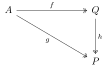

In [7]:
using TikzCDs

triangle = L"""
A &&& Q \\
\\
&&& P
\arrow["h", two heads, from=1-4, to=3-4]
\arrow["f", two heads, from=1-1, to=1-4]
\arrow["g"', two heads, from=1-1, to=3-4]
""";

TikzCD(triangle, preamble=TikzCDs.Styles.Quiver)

Let's take a look at an example:

In [8]:
A = FinSet(4)
Q = FinSet(3)
P = FinSet(2)

f = FinFunction([1,2,3,3], A, Q)
g = FinFunction([1,1,2,2], A, P)
h = FinFunction([1,1,2], Q, P)

@test_throws ErrorException compose(g,h) #Catlab checks the domains match

pretty_table(compose(f,h), Symbol("(f⋅h)"))

compose(f,h) == g

┌───────┬──────────┐
│     x │ (f⋅h)(x) │
│ Int64 │    Int64 │
├───────┼──────────┤
│     1 │        1 │
│     2 │        1 │
│     3 │        2 │
│     4 │        2 │
└───────┴──────────┘


true

This triangle commutes, so f is a refinement of g equivalently g is coarser than f.

In [9]:
h′ = FinFunction([1,1], P, FinSet(1))

pretty_table(f⋅h⋅h′, Symbol("f⋅h⋅h′"))

┌───────┬───────────┐
│     x │ f⋅h⋅h′(x) │
│ Int64 │     Int64 │
├───────┼───────────┤
│     1 │         1 │
│     2 │         1 │
│     3 │         1 │
│     4 │         1 │
└───────┴───────────┘


### Properties of refinements
We can show that refinement gives us a preorder on partitions directly from the
nice properties of surjective maps.
1. Reflexive: Any partition is a refinement of itself.
2. Transitive: If f ≤ g ≤ h as partitions, then f ≤ h
You can read these directly off the definition of refinements as a commutative
triangle in the category of (Set, Surjections).
You can edit this diagram in [quiver](https://q.uiver.app/?q=WzAsNCxbMCwwLCJBIl0sWzMsMCwiUSJdLFszLDIsIlAiXSxbMyw0LCJRXlxccHJpbWUiXSxbMSwyLCJoIl0sWzAsMSwiZiIsMCx7InN0eWxlIjp7ImhlYWQiOnsibmFtZSI6ImVwaSJ9fX1dLFswLDIsImciLDIseyJzdHlsZSI6eyJoZWFkIjp7Im5hbWUiOiJlcGkifX19XSxbMiwzLCJoXlxccHJpbWUiXSxbMCwzLCJmXFxjZG90IGhcXGNkb3QgaF5cXHByaW1lID0gZ1xcY2RvdCBoXlxccHJpbWUiLDIseyJzdHlsZSI6eyJoZWFkIjp7Im5hbWUiOiJlcGkifX19XV0=)

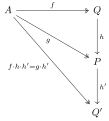

In [10]:
refinement = L"""
A &&& Q \\
\\
&&& P \\
\\
&&& {Q^\prime}
\arrow["h", from=1-4, to=3-4]
\arrow["f", two heads, from=1-1, to=1-4]
\arrow["g"', two heads, from=1-1, to=3-4]
\arrow["{h^\prime}", from=3-4, to=5-4]
\arrow["{f\cdot h\cdot h^\prime = g\cdot h^\prime}"', two heads, from=1-1, to=5-4]
""";

TikzCD(refinement, preamble=TikzCDs.Styles.Quiver)